Epochs :   0%|          | 0/1000 [00:00<?, ?it/s]

Cost at iteration 0: 0.6575878262519836
Cost at iteration 100: 0.3568367063999176
Cost at iteration 200: 0.26113173365592957
Cost at iteration 300: 0.20964118838310242
Cost at iteration 400: 0.17853353917598724
Cost at iteration 500: 0.1579681634902954
Cost at iteration 600: 0.1429586559534073
Cost at iteration 700: 0.13134604692459106
Cost at iteration 800: 0.12211344391107559
Cost at iteration 900: 0.11461066454648972
Cost at iteration 999: 0.10854732245206833


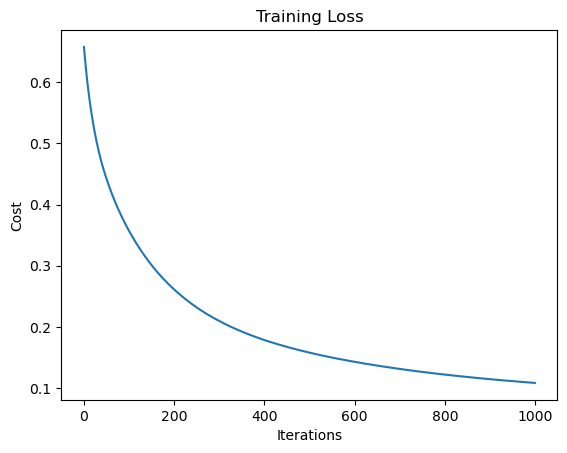

Test Accuracy: 0.9825


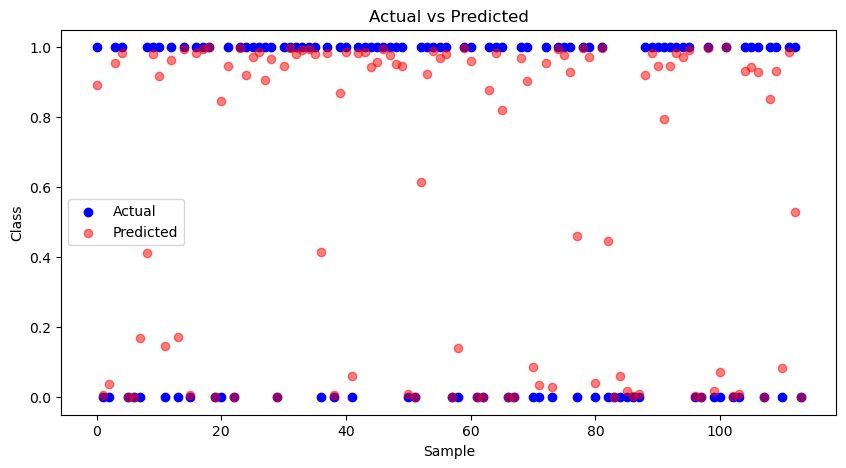

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [1]:
import torch
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nn import NeuralNetwork
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

# Define the neural network architecture
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
layer_dims = [input_size, hidden_size, output_size]

# Create and train the model
model = NeuralNetwork(layer_dims)
costs = model.train(X_train_tensor, y_train_tensor, num_iterations=1000, learning_rate=0.01)

# Plot the training loss
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Loss')
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(X_test_tensor)
y_pred_binary = (y_pred > 0.5).float()

accuracy = (y_pred_binary == y_test_tensor).float().mean()
print(f"Test Accuracy: {accuracy.item():.4f}")

# Plot some predictions
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred.squeeze().detach().numpy(), color='red', alpha=0.5, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Class')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_binary.squeeze().numpy()))

Epochs :   0%|          | 0/1000 [00:00<?, ?it/s]

Cost at iteration 0: 0.8204284310340881
Cost at iteration 100: 0.7028922438621521
Cost at iteration 200: 0.6150851845741272
Cost at iteration 300: 0.5484820008277893
Cost at iteration 400: 0.49749618768692017
Cost at iteration 500: 0.45754027366638184
Cost at iteration 600: 0.42519527673721313
Cost at iteration 700: 0.39825567603111267
Cost at iteration 800: 0.37552687525749207
Cost at iteration 900: 0.35607609152793884
Cost at iteration 999: 0.33936065435409546


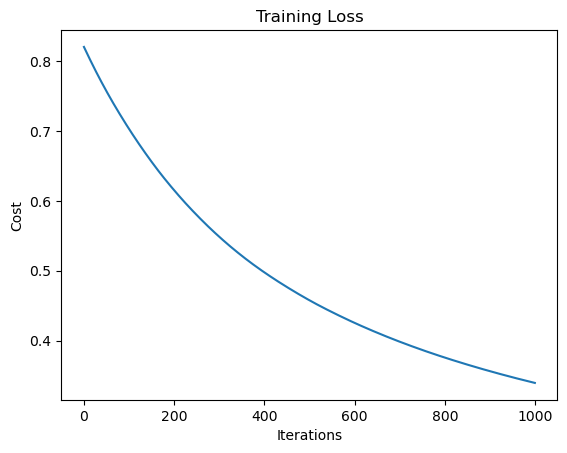

Test Accuracy: 0.9123


In [2]:
# training the model on gpu
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

model = NeuralNetwork(layer_dims).to(device)

costs = model.train(X_train_tensor, y_train_tensor, num_iterations=1000, learning_rate=0.001)

# Plot the training loss
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Loss')
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(X_test_tensor)
y_pred_binary = (y_pred > 0.5).float()

accuracy = (y_pred_binary == y_test_tensor).float().mean()


print(f"Test Accuracy: {accuracy.item():.4f}")

# Testing Softmax

tensor([[0.6179, 0.3821],
        [0.6126, 0.3874],
        [0.6053, 0.3947],
        [0.6268, 0.3732],
        [0.6561, 0.3439],
        [0.6061, 0.3939],
        [0.6460, 0.3540],
        [0.6018, 0.3982],
        [0.6191, 0.3809],
        [0.6239, 0.3761],
        [0.6501, 0.3499],
        [0.6608, 0.3392],
        [0.6151, 0.3849],
        [0.6177, 0.3823],
        [0.6035, 0.3965],
        [0.6463, 0.3537],
        [0.6298, 0.3702],
        [0.6552, 0.3448],
        [0.6084, 0.3916],
        [0.6059, 0.3941],
        [0.6248, 0.3752],
        [0.5914, 0.4086],
        [0.6283, 0.3717],
        [0.6453, 0.3547],
        [0.6149, 0.3851],
        [0.6264, 0.3736],
        [0.6130, 0.3870],
        [0.6449, 0.3551],
        [0.6410, 0.3590],
        [0.6073, 0.3927]])
Initial parameters:
W1:
tensor([[0.4281, 0.2300],
        [1.3487, 1.0684],
        [0.8993, 0.3116]])

b1:
tensor([[0.],
        [0.],
        [0.]])

W2:
tensor([[ 0.8868,  0.1579,  1.2349],
        [ 0.4137, -0.2892,

Epochs :   0%|          | 0/50 [00:00<?, ?it/s]

Cost at iteration 0: 0.6989254355430603
Cost at iteration 49: 0.6816828846931458
Final parameters:
W1:
tensor([[0.4281, 0.2301],
        [1.3484, 1.0680],
        [0.8985, 0.3110]])

b1:
tensor([[ 5.3263e-05],
        [-5.3489e-04],
        [-1.0405e-03]])

W2:
tensor([[ 0.8866,  0.1571,  1.2345],
        [ 0.4137, -0.2892, -0.2827],
        [ 0.8089, -0.2523, -0.0311],
        [-0.3877,  0.3400,  0.3434]])

b2:
tensor([[-5.1787e-04],
        [ 0.0000e+00],
        [-8.4102e-05],
        [-1.5360e-03]])

W3:
tensor([[-0.1585,  0.3904,  0.4072,  0.0384],
        [ 0.1612,  0.3895,  0.1068, -1.2562],
        [ 0.2648,  0.6449,  0.1218,  0.7893]])

b3:
tensor([[ 0.0000],
        [ 0.0000],
        [-0.0019]])

W4:
tensor([[ 0.3289, -1.1077, -0.0341],
        [ 0.1581,  0.5394, -0.0135]])

b4:
tensor([[ 0.0578],
        [-0.0578]])

Expected Output: 
tensor([[0.9318, 0.0682]])
Predicted data based on trained weights: 
Input: 
tensor([[4., 8.]])
Output: 
tensor([[0.4065, 0.5935]])


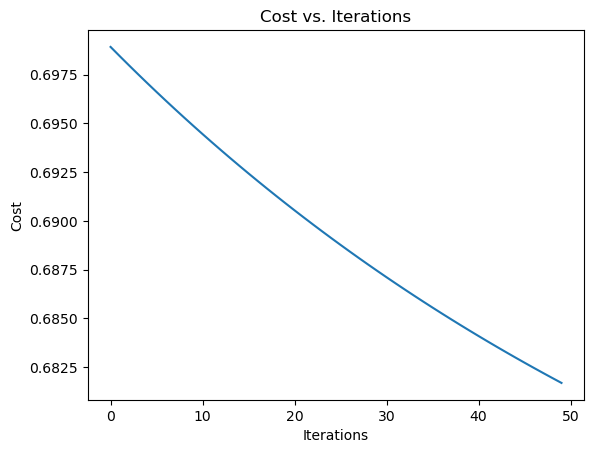

In [3]:
import torch 
from nn import NeuralNetwork
from sklearn.preprocessing import StandardScaler

# create 30 tensors of 2 random numbers
X = torch.rand(30, 2, dtype=torch.float)
actual_w = torch.rand(2, 2, dtype=torch.float)
actual_b = torch.rand(2, 1, dtype=torch.float)

y = torch.mm(X, actual_w) + actual_b.T
y = torch.softmax(y, dim=1)  # Apply softmax to get probabilities
print(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = torch.tensor(X_scaled, dtype=torch.float)

layer_dims = [2, 3, 4, 3, 2]

model = NeuralNetwork(layer_dims)

print("Initial parameters:")
for key, value in model.params.items():
    print(f"{key}:\n{value}\n")
    

costs = model.train(X_scaled, y, num_iterations=50, learning_rate=0.01)

print("Final parameters:")
for key, value in model.params.items():
    print(f"{key}:\n{value}\n")

X_test = torch.tensor([[4, 8]], dtype=torch.float)  # 1 x 2 tensor
y_test = torch.mm(X_test, actual_w) + actual_b.T
y_test = torch.softmax(y_test, dim=1)
print("Expected Output: \n" + str(y_test))
X_test_scaled = torch.tensor(scaler.transform(X_test), dtype=torch.float)

print("Predicted data based on trained weights: ")
print("Input: \n" + str(X_test))
print("Output: \n" + str(model.predict(X_test_scaled)))

# Plot the cost over iterations
import matplotlib.pyplot as plt

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()